<a href="https://colab.research.google.com/github/ioahKwon/Machine-Learning-Deep-Learning/blob/master/%5B%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B3%BC%EB%94%A5%EB%9F%AC%EB%8B%9D%5D_Week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[머신러닝과딥러닝] 수업 정리 Week #8**

### _2020.08._ SKKU Lecture Summary by IOAH


---





### 1. 데이터 생성 및 SVM

SVM 모델의 학습과 학습 결과 시각화 실습을 위해 데이터 포인트를 생성한다. Make_blobs 함수를 통해 분류 데이터를 생성하고 학습시킨다. 이 함수는 샘플의 수와 센터 수를 조절할 수 있다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples = 40, centers = 2, random_state = 20)
clf = svm.SVC(kernel = 'linear')
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

그 다음 학습된 모델을 토대로 visualizing하면 아래와 같다.

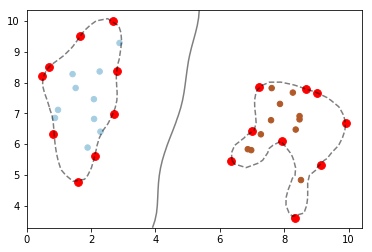

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap = plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX =np.meshgrid(yy,xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', 
           levels = [-1,0,1],
           alpha = 0.5, 
           linestyles = ['--', '-','--'])
##서포트 벡터 표현
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=60, facecolors='r')
plt.show()


빨간 점이 Support Vector 이며 굵은 회색 선이 Hyperplane이다. SVM모델은 svm.SVC(kernel='linear') 함수를 이용하여 SVM 모델을 생성하는데 여기서 커널을 , 'rbf', 'poly', 'sigmoid' 으로 변경해서 실습을 진행하니 아래와 같았다.

In [ ]:
##커널 변경
clf = svm.SVC(kernel = 'rbf')
clf.fit(X,y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

* 왼쪽 위에서 오른쪽 아래 순으로 Linear, rbf, poly, sigmoid 이다.

In [1]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving 1.JPG to 1.JPG
User uploaded file "1.JPG" with length 29595 bytes


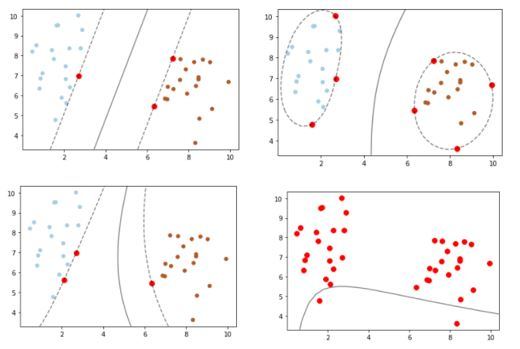

In [2]:
from IPython.display import Image
Image('1.JPG')

학습된 모델들의 decision boundary를 확인하니 linear와 Linear, ‘rbf’, poly는 분류가 잘 된 것을 확인할 수 있었지만 sigmoid는 그거에 비해 분류가 잘 되지 않았다는 것을 확인할 수 있었다.
특히나 Linear, ‘rbf’, poly 중에서도 ‘rbf’의 성능이 가장 좋았다. 가장 compact 하게 데이터들이 뭉쳐져 있었으며 다른 모델들에 비해 Support Vector 사이 거리가 가장 큰 것을 확인할 수 있었다. 


## 2. IRIS 데이터 SVM

앞서 생성된 데이터를 대상으로 실시한 SVM 모델의 생성 및 학습을 실제 예제 데이터인 iris datatset에 적용하여 실습을 진행해보도록 하겠다. 우선 데이터를 load한 뒤 데이터셋의 feature 중 하나인 sepal length와 sepal width를 이용하여 SVM을 진행해보고 이를 Visualizing하였다. Kernel은 linear로 썼다.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [ ]:
iris = load_iris()
iris_frame = pd.DataFrame(data=np.c_[iris['data'], iris['target']],columns = iris['feature_names'] + ['target'])
iris_frame['target'] = iris_frame['target'].map({1:"versicolor",0:"setosa",2:"virginica"})
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:
## 밑의 'linear'를 변경해서 모델을 다르게 학습시킬 수 있다.

clf = svm.SVC(kernel = 'linear')


import matplotlib.colors as colors
df1 = iris_frame[["sepal length (cm)","sepal width (cm)","target"]]
X= df1.iloc[:,0:2]
Y= df1.iloc[:,2].replace({'setosa' : 0,
                          'versicolor':1,
                          'virginica':2}).copy()
clf.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

그 다음 아래의 코드를 이용하여 시각화하면 다음과 같은 결과가 나온다. 

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


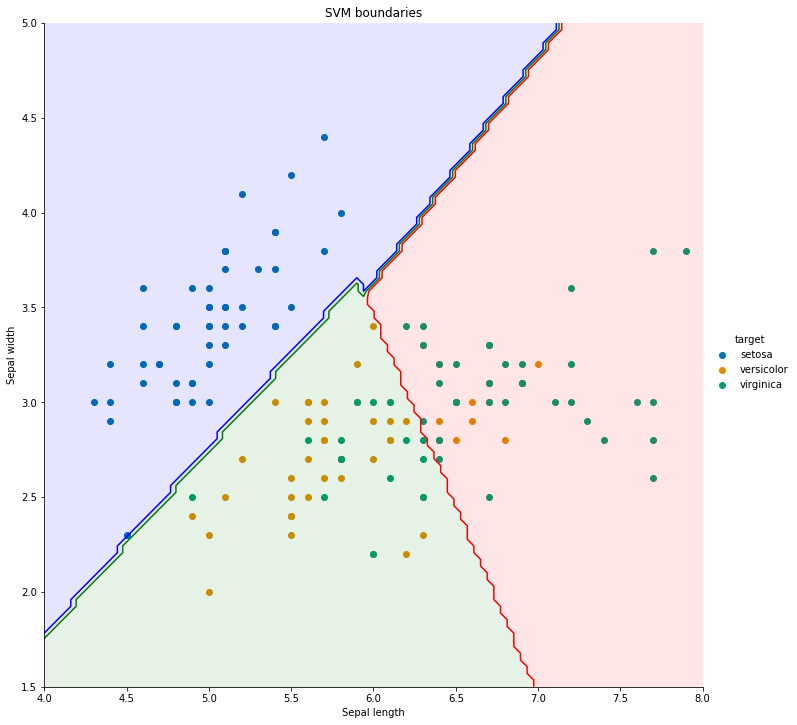

In [ ]:
import seaborn as sn

N = 100
X_ = np.linspace(4,8, N)
Y_ = np.linspace(1.5,5, N)
X_,Y_=np.meshgrid(X_, Y_)
color_list = ["Blues, Greens, Reds"]
my_norm = colors.Normalize(vmin = -1, vmax = 1.)
g = sn.FacetGrid(iris_frame,hue = "target", 
                 size= 10, 
                 palette = "colorblind").map(plt.scatter, 
                                             "sepal length (cm)",
                                            "sepal width (cm)",).add_legend()

my_ax = g.ax
zz =  np.array( [clf.predict ([[xx,yy]]) [0] for xx,yy in zip(np.ravel(X_),np.ravel(Y_))])
Z = zz.reshape(X_.shape)
my_ax.contourf(X_,Y_,Z,2,alpha=.1, colors = ('blue','green','red'))
my_ax.contour(X_,Y_,Z,2,alpha=1, colors = ('blue','green','red'))

X_= np.linspace(4,8,N)
Y_= np.linspace(1.5,5,N)
X_,Y_= np.meshgrid(X_,Y_)

my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('SVM boundaries')


plt.show()

Kernel을 1번에서와 같이 linear, rbf, poly, sigmoid 다양하게 줘보자. 왼쪽 위에서 오른쪽 아래까지 순서대로 kernel을 linear, rbf, poly, sigmoid로 줬을 때의 결과이다.

In [7]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving 12.JPG to 12.JPG
User uploaded file "12.JPG" with length 29674 bytes


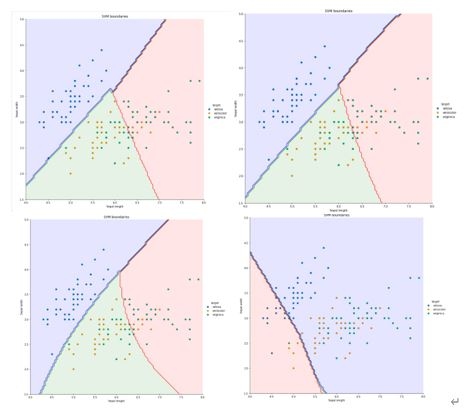

In [9]:
from IPython.display import Image
Image('12.JPG')

결과를 통해 볼 수 있듯이 kernel을 어떻게 주느냐에 따라 decision boundary가 다르게 생성되는 것을 볼 수 있다. Poly가 가장 boundary를 곡선으로 짠 것을 볼 수 있다. 가장 정확한 것은 이번에는 poly로 보인다. 하지만 sigmoid는 이번에도 영 좋지 못한 성능을 보임을 확인할 수 있다.